#  <font color='#0033CC'><u>PROJET  P10 : Détectez des faux billets</font>

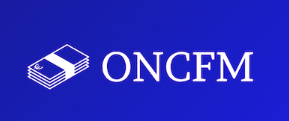

 #  <font color='grey'><u>SCENARIO</font>
   
Vous êtes consultant Data Analyst dans une entreprise spécialisée dans la data. Votre entreprise a décroché une prestation en régie au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).

Cette institution a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Ils font donc appel à vous, spécialiste de la data, pour mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets. Et ce à partir simplement de certaines dimensions du billet et des éléments qui le composent.

Le client souhaite que vous travailliez directement depuis ses locaux sous la responsabilité de Marie, responsable du projet d’analyse de données à l’ONCFM. Elle vous laissera une grande autonomie pendant votre mission, et vous demande simplement que vous lui présentiez vos résultats une fois la mission terminée. Elle souhaite voir quels sont les traitements et analyses que vous avez réalisés en amont, les différentes pistes explorées pour la construction de l’algorithme, ainsi que le modèle final retenu.  
[cahier des charges de l’ONCFM](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P10-cdc-detection-faux-billets.pdf)

#   <font color='grey'><u><a name="C">§</a> SOMMAIRE</font>
    
## <a href="#A1">1 - Préparation des données</a>

- 1.1 - Estimation des valeurs manquantes par régression linéaire simple
- 1.2 - Estimation des valeurs manquantes par régression linéaire multiple
- 1.3 - Remplacement des valeur manquantes
- 1.4 - Visualisation de l'échantillon
- 1.5 - Analyse des valeurs aberrantes
    
## <a href="#A2">2 - Modélisation sur valeurs brutes</a>

- 2.1 - Préparation des train_set et test_set 
- 2.2 - Utilisation d'un Dummy classifier
- 2.3 - Modélisation par régression logistique
- 2.4 - Modélisation par Kmeans
- 2.5 - Conception de l'outils de prédiction
    
## <a href="#A3">3 - Modélisation sur valeurs normalisées</a>

- 3.1 - Normalisation des valeurs
- 3.2 - Modélisation par régression logistique
- 3.3 - Modélisation par Kmeans
- 3.4 - Fonction de détection de faux billets, avec données normalisées
    
## <a href="#A4">4 - Conclusion</a>

- 4.1 - Comparaison des méthodes
- 4.2 - Outils de prédiction

# <a name="A1">1 - Préparation des données</a> <a href="#C">§</a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
billets = pd.read_csv('billets.csv',sep=';')

In [4]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [5]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
billets.duplicated().sum()

0

In [7]:
billets.drop(columns='is_genuine').duplicated().sum()

0

In [8]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [9]:
billets.loc[billets['margin_low'].isna()==True]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


Les données sont cohérentes, seules manquent 37 valeurs de la variable 'margin_low'.

## 1.1 - Estimation des valeurs manquantes par régression linéaire simple

Je réalise une étude des corrélations entre les variables, afin de déterminer celles qui permettront la meilleure estimation des valeurs manquantes.

In [10]:
billets.corr(method ='pearson')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


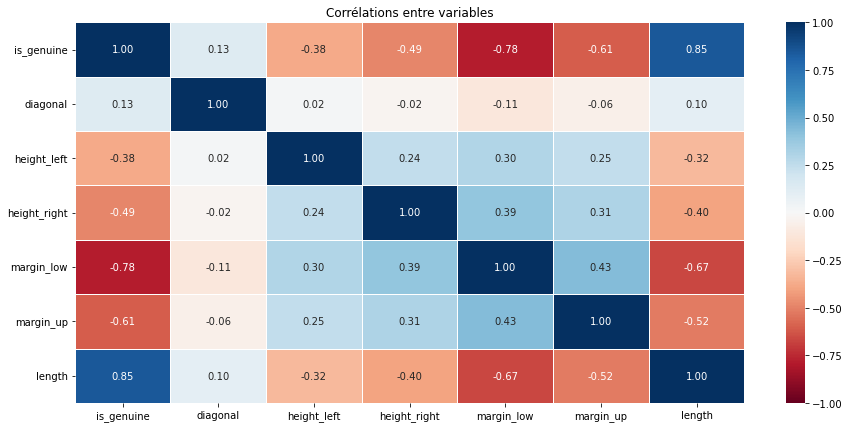

In [11]:
# Visualisation par un heatmap
plt.figure(figsize = (15,7))
sns.heatmap(billets.corr(), cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, fmt='0.2f',linewidth=1)
plt.title("Corrélations entre variables", fontsize=12);

La corrélation la plus forte avec 'margin_low' se fait avec 'length'. Je choisis d'évaluer les valeurs manquantes par régression linéaire simple entre ces 2 variables.

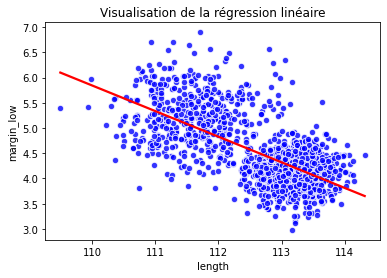

In [12]:
# Visualisation de la régression linéaire.
sns.regplot(x="length",y="margin_low", data=billets, ci=None, scatter_kws={'color' :'blue','s':40, 'edgecolor':'white'}, line_kws={'color': 'r'})
plt.title("Visualisation de la régression linéaire", fontsize=12);

In [13]:
from sklearn.linear_model import LinearRegression

J'entraine la régression linéaire sur le dataframe billets sans les valeurs manquantes.  

In [14]:
billets_reg=billets.dropna()

In [15]:
X = billets_reg[["length"]]
y = billets_reg["margin_low"]

In [16]:
model_linReg = LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=10,shuffle=True)

In [19]:
X_train.shape

(1097, 1)

In [20]:
y_train.shape

(1097,)

In [21]:
y_train

1012    4.97
557     4.69
1410    5.06
175     3.97
1306    5.80
        ... 
1428    5.09
1379    5.47
540     4.46
1181    5.60
1323    5.10
Name: margin_low, Length: 1097, dtype: float64

In [22]:
model_linReg.fit(X_train, y_train)

LinearRegression()

In [23]:
# accuracy score = nombre de bonne predictions/nombre total de prediction
train_score = model_linReg.score(X_train, y_train)
test_score = model_linReg.score(X_test, y_test)

In [24]:
 print(f"score train : {round(train_score,2)} score test : {round(test_score,2)}")

score train : 0.43 score test : 0.48


Les scores sont moyens, pas de risque d'overfitting. On note d'ailleurs que le test_score est légèrement supérieur au train_score.

In [25]:
# analyse des métriques de la modélisation
y_pred=model_linReg.predict(X_test)
y_true= y_test

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_true, y_pred)

0.4833327682297355

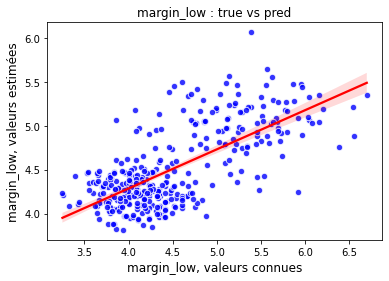

In [28]:
# Visualisation
sns.regplot(y_true, y_pred, scatter_kws={'color' :'blue','s':40, 'edgecolor':'white'}, line_kws={'color': 'r'})
plt.title("margin_low : true vs pred", fontsize=12)
plt.xlabel('margin_low, valeurs connues',fontsize=12)
plt.ylabel('margin_low, valeurs estimées',fontsize=12);

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
rmse_score=mean_squared_error(y_true, y_pred)
rmse_score

0.24648750341321027

On observe une valeur faible du rmse_score.  
Le modèle semble valable, appliquons-le à l'estimation des valeurs manquantes.

#### Prédiction des valeurs manquantes

In [31]:
billets_nan = billets.loc[billets['margin_low'].isna()==True]

In [32]:
prediction=model_linReg.predict(billets_nan[['length']])
prediction

array([4.43177213, 4.28820493, 4.36246383, 4.19414366, 4.64464764,
       4.21889663, 4.18424248, 4.14958833, 4.35256264, 4.35256264,
       4.34266146, 3.83770096, 4.00602113, 4.40701917, 4.43177213,
       4.19414366, 4.50108044, 4.61989467, 4.29315553, 4.12483536,
       3.61492427, 4.15453892, 4.0208729 , 4.19414366, 3.92186104,
       3.99116935, 4.43672273, 4.48622866, 4.14463773, 4.8872267 ,
       4.62979586, 5.1743611 , 5.21396584, 4.67930179, 5.65951922,
       5.08525042, 5.07534924])

Avant de remplacer les valeurs manquantes, il me semble interressant de comparer les résultats obtenus avec une régression linéaire multiple.

## 1.2 - Estimation des valeurs manquantes par régression linéaire multiple

In [33]:
billets_2 = pd.read_csv('billets.csv',sep=';')

In [34]:
billets_2_reg=billets_2.dropna()

Cette fois j'utilise 4 variables, j'écarte 'diagonal' qui est très peu corrélée avec 'margin_low'. 

In [35]:
X = billets_2_reg[["height_left","height_right","margin_up","length",]]
y = billets_2_reg["margin_low"]

In [36]:
model_linReg_2 = LinearRegression()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=10,shuffle=True)

In [38]:
X_train.shape

(1097, 4)

In [39]:
y_train.shape

(1097,)

In [40]:
model_linReg_2.fit(X_train, y_train)

LinearRegression()

In [41]:
# accuracy score = nombre de bonne predictions/nombre total de prediction
train_score = model_linReg_2.score(X_train, y_train)
test_score = model_linReg_2.score(X_test, y_test)

In [42]:
 print(f"score train : {round(train_score,2)} score test : {round(test_score,2)}")

score train : 0.46 score test : 0.5


Les scores sont légèrement supérieurs à ceux obtenus par régression linéaire simple.

In [43]:
# prédiction sur X_test
y_pred=model_linReg_2.predict(X_test)

In [44]:
# analyse des métriques de la modélisation
y_true= y_test
y_pred=y_pred

In [45]:
r2_score(y_true, y_pred)

0.5031344003691427

In [46]:
rmse_score=mean_squared_error(y_true, y_pred)
rmse_score

0.23704069786909646

L'analyse des métriques montre une légère augmentation du r2_score et une légère diminution du rmse_score, donc dans l'ensemble une amélioration du modèle de prédiction.  
Toutefois l'estimation réalisée à partir de la seule variable 'length' était très proche.

#### Prédiction des valeurs manquantes

In [47]:
billets_2_nan = billets_2.loc[billets_2['margin_low'].isna()==True]

In [48]:
prediction_2=model_linReg_2.predict(billets_2_nan[["height_left","height_right","margin_up","length"]])
prediction_2

array([4.31455982, 4.40144742, 4.43254278, 4.26229097, 4.64074806,
       3.77921205, 4.18120752, 4.12490308, 4.20180684, 4.19726331,
       4.22592906, 3.76960241, 4.08092458, 4.27664711, 4.16483658,
       4.06886448, 4.45103115, 4.48020104, 4.36939997, 4.14021896,
       3.6335162 , 4.35324289, 4.12000672, 4.19403928, 3.89011866,
       3.75471825, 4.2516339 , 4.68165302, 4.15773262, 5.00914662,
       4.74688329, 5.01783008, 5.06539515, 4.79299824, 5.68082159,
       5.25805319, 5.12998599])

#### Tests sur les hypothèses de la régression linéaire.

In [49]:
from scipy import stats
import statsmodels.api as sm

In [50]:
res = y_test - y_pred

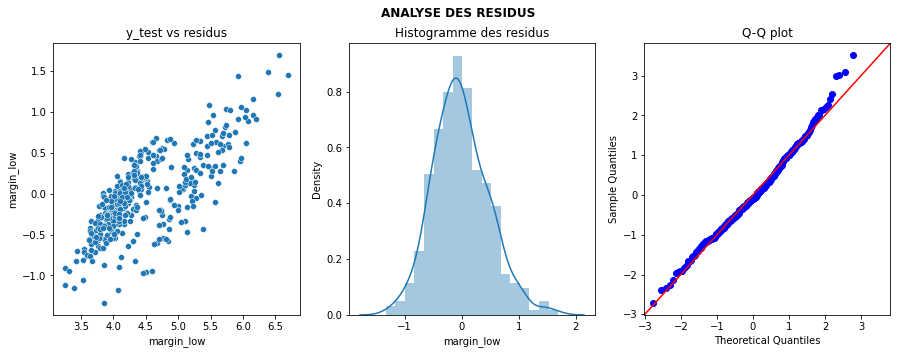

In [51]:
# Normalité des résidus
fig, axs = plt.subplots(1,3, figsize=(15,5))
plt.suptitle('ANALYSE DES RESIDUS', fontsize=12,fontweight='bold')
plt.subplot(1,3,1).set_title('y_test vs residus')
sns.scatterplot(y_test,res)
plt.subplot(1,3,2).set_title('Histogramme des residus')
sns.distplot(res)
plt.subplot(1,3,3).set_title('Q-Q plot')
sm.qqplot(res,fit=True,line = '45',ax=axs[2])
plt.show()

In [52]:
print(f' mean_residual = {res.mean():.1f}, std= {res.std():.1f}, skew = {res.skew():.4f} , kurtosis= {res.kurtosis():.2f}' )

 mean_residual = -0.0, std= 0.5, skew = 0.3892 , kurtosis= 0.40


In [53]:
stat, p = stats.normaltest(res)
print('Statistiques=%.3f, p=%.5f' % (stat, p))

Statistiques=11.127, p=0.00383


Hypothèse Ho : la distribution des résidus est gaussienne.    
Ici, l'hypothèse de normalité est remise en cause (p-value = 0.004 < 0.05, donc H0 est rejetée). Toutefois, l'observation des résidus et la taille de l'échantillon rendent acceptable le modèle linéaire gaussien.

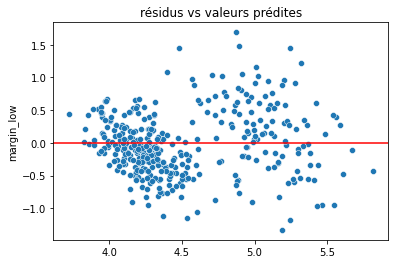

In [54]:
# Homoscédasticité des résidus
sns.scatterplot(y_pred, res)
plt.title('résidus vs valeurs prédites')
plt.axhline(y=0, color='red')
plt.show();

La variance des résidus est assez constante.

## 1.3 - Remplacement des valeur manquantes

Compte tenu des résultats, les valeurs manquantes sont remplacées par les valeurs estimées à l'aide de la régression multiple.

In [55]:
billets.loc[billets['margin_low'].isna(),'margin_low'] = prediction_2

In [56]:
billets.iloc[billets_nan.index]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.314560,3.25,112.79
99,True,171.93,104.07,104.18,4.401447,3.14,113.08
151,True,172.07,103.80,104.38,4.432543,3.02,112.93
197,True,171.45,103.66,103.80,4.262291,3.62,113.27
241,True,171.83,104.14,104.06,4.640748,3.02,112.36
251,True,171.80,103.26,102.82,3.779212,2.95,113.22
284,True,171.92,103.83,103.76,4.181208,3.23,113.29
334,True,171.85,103.70,103.96,4.124903,3.00,113.36
410,True,172.56,103.72,103.51,4.201807,3.12,112.95
413,True,172.30,103.66,103.50,4.197263,3.16,112.95


## 1.4 - Visualisation de l'échantillon

Avant de travailler sur l'algorithme de détection des faux billets, réalisons une analyse descriptive des données.

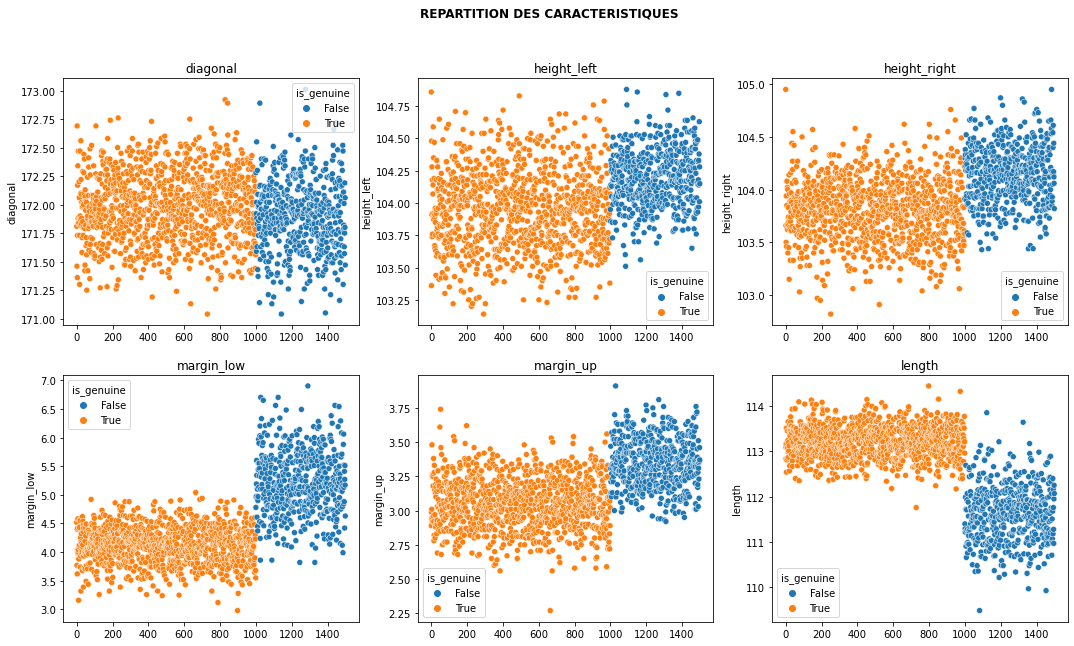

In [57]:
# Répartition des caractéristiques entre les vrais et faux billets.
plt.figure(figsize =(18,10))
plt.suptitle("REPARTITION DES CARACTERISTIQUES", fontsize=12,fontweight='bold')
plt.subplot(2,3,1).set_title('diagonal')
sns.scatterplot(x=billets.index, y='diagonal', data=billets, hue='is_genuine')
plt.subplot(2,3,2).set_title('height_left')
sns.scatterplot(x=billets.index, y='height_left', data=billets, hue='is_genuine')
plt.subplot(2,3,3).set_title('height_right')
sns.scatterplot(x=billets.index, y='height_right', data=billets, hue='is_genuine')
plt.subplot(2,3,4).set_title('margin_low')
sns.scatterplot(x=billets.index, y='margin_low', data=billets, hue='is_genuine')
plt.subplot(2,3,5).set_title('margin_up')
sns.scatterplot(x=billets.index, y='margin_up', data=billets, hue='is_genuine')
plt.subplot(2,3,6).set_title('length')
sns.scatterplot(x=billets.index, y='length', data=billets, hue='is_genuine');

Les valeurs de 'margin_low' et 'length' sont très différentes entre les vrais et faux billets. La différence est moins marquée pour 'height_left', 'height_right' et 'margin_up'. Les valeurs de 'diagonal' sont uniformes entre les deux groupes.

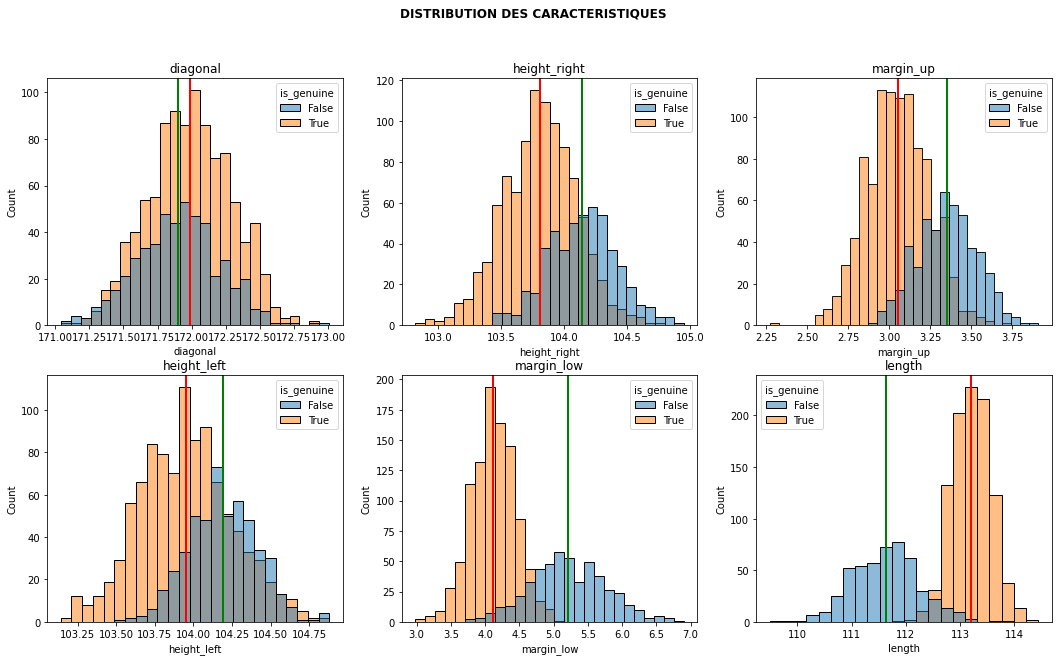

In [58]:
# Distribution des caractéristiques
plt.figure(figsize =(18,10))
plt.suptitle("DISTRIBUTION DES CARACTERISTIQUES", fontsize=12,fontweight='bold')
plt.subplot(2,3,1).set_title('diagonal')
xbar_diagonal_t=(billets.loc[billets['is_genuine']==True, 'diagonal']).mean()
plt.axvline(xbar_diagonal_t, color='r', linewidth=2)
xbar_diagonal_f=(billets.loc[billets['is_genuine']==False, 'diagonal']).mean()
plt.axvline(xbar_diagonal_f, color='g', linewidth=2)
sns.histplot(x='diagonal', data=billets, hue='is_genuine')

plt.subplot(2,3,2).set_title('height_right')
xbar_height_right_t=(billets.loc[billets['is_genuine']==True, 'height_right']).mean()
plt.axvline(xbar_height_right_t, color='r', linewidth=2)
xbar_height_right_f=(billets.loc[billets['is_genuine']==False, 'height_right']).mean()
plt.axvline(xbar_height_right_f, color='g', linewidth=2)
sns.histplot(x='height_right', data=billets, hue='is_genuine')

plt.subplot(2,3,3).set_title('margin_up')
xbar_margin_up_t=(billets.loc[billets['is_genuine']==True, 'margin_up']).mean()
plt.axvline(xbar_margin_up_t, color='r', linewidth=2)
xbar_margin_up_f=(billets.loc[billets['is_genuine']==False, 'margin_up']).mean()
plt.axvline(xbar_margin_up_f, color='g', linewidth=2)
sns.histplot(x='margin_up', data=billets, hue='is_genuine')

plt.subplot(2,3,4).set_title('height_left')
xbar_height_left_t=(billets.loc[billets['is_genuine']==True, 'height_left']).mean()
plt.axvline(xbar_height_left_t, color='r', linewidth=2)
xbar_height_left_f=(billets.loc[billets['is_genuine']==False, 'height_left']).mean()
plt.axvline(xbar_height_left_f, color='g', linewidth=2)
sns.histplot(x='height_left', data=billets, hue='is_genuine')

plt.subplot(2,3,5).set_title('margin_low')
xbar_margin_low_t=(billets.loc[billets['is_genuine']==True, 'margin_low']).mean()
plt.axvline(xbar_margin_low_t, color='r', linewidth=2)
xbar_margin_low_f=(billets.loc[billets['is_genuine']==False, 'margin_low']).mean()
plt.axvline(xbar_margin_low_f, color='g', linewidth=2)
sns.histplot(x='margin_low', data=billets, hue='is_genuine')

plt.subplot(2,3,6).set_title('length')
xbar_length_t=(billets.loc[billets['is_genuine']==True, 'length']).mean()
plt.axvline(xbar_length_t, color='r', linewidth=2)
xbar_length_f=(billets.loc[billets['is_genuine']==False, 'length']).mean()
plt.axvline(xbar_length_f, color='g', linewidth=2)
sns.histplot(x='length', data=billets, hue='is_genuine');

Cette représentation fait apparaître encore plus clairement les différences de caractéristiques entre les deux groupes de billets. J'ai fais figurer les valeurs moyennes en rouge pour les vrais billets , en vert pour les faux billets.
La distribution est très différentes pour 'margin_low' et 'length', et semble quasiment identique pour 'diagonal'.  
A ce stade il est intéressant de tester l'égalité des moyennes.

In [59]:
billets.groupby('is_genuine')[['diagonal', 'height_right', 'margin_up','height_left', 'margin_low', 'length']].mean().round(2)

,diagonal,height_right,margin_up,height_left,margin_low,length
is_genuine,,,,,,
False,171.90,104.14,3.35,104.19,5.21,111.63
True,171.99,103.81,3.05,103.95,4.12,113.20


In [60]:
#Tests d'égalité des variances et des moyennes
import scipy.stats as st

Je réalise le test de Bartlett en une seule fois, à l'aide d'une boucle for.  
Pour cela je commence par supprimer la colonne 'is_genuine' de ma boucle.

In [61]:
liste =billets.columns.tolist()

In [62]:
liste

['is_genuine',
 'diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [63]:
liste.pop(0)

'is_genuine'

In [64]:
for i in liste :
    print('Pour la variable', i,':', st.bartlett(billets.loc[billets['is_genuine']==True][i], billets.loc[billets['is_genuine']==False][i]))  

Pour la variable diagonal : BartlettResult(statistic=0.2987117108240286, pvalue=0.5846911917435405)
Pour la variable height_left : BartlettResult(statistic=53.27625211922919, pvalue=2.8978873571016144e-13)
Pour la variable height_right : BartlettResult(statistic=3.542589524124933, pvalue=0.05981201390578732)
Pour la variable margin_low : BartlettResult(statistic=217.07481643292883, pvalue=3.930608044284443e-49)
Pour la variable margin_up : BartlettResult(statistic=0.6698400851031404, pvalue=0.41310736619306765)
Pour la variable length : BartlettResult(statistic=207.23111965352825, pvalue=5.520465521419425e-47)


Les p values > 0.05 , pour diagonal, height_right et margin_up, les variances des 2 groupes sont égales pour ces variables.   
On peut faire le test de Student sur leurs moyennes.

Je vérifie les résultats pour 'diagonal' et 'length':

In [65]:
billets.loc[billets['is_genuine']==True, 'diagonal'].std()

0.30044090656623007

In [66]:
billets.loc[billets['is_genuine']==False, 'diagonal'].std()

0.30686117702297844

In [67]:
billets.loc[billets['is_genuine']==True, 'length'].std()

0.3595520445954557

In [68]:
billets.loc[billets['is_genuine']==False, 'length'].std()

0.6155434817751804

Je réalise les tests de Student en une seule fois, à l'aide d'une boucle for.

In [69]:
liste=['diagonal','height_right','margin_up']

In [70]:
for i in liste :
    print('Pour la variable', i,':', st.ttest_ind(billets.loc[billets['is_genuine']==True][i], billets.loc[billets['is_genuine']==False][i]))  

Pour la variable diagonal : Ttest_indResult(statistic=5.184087524514633, pvalue=2.4668667372034535e-07)
Pour la variable height_right : Ttest_indResult(statistic=-21.470310019402618, pvalue=2.2708556903459502e-89)
Pour la variable margin_up : Ttest_indResult(statistic=-29.50561631725463, pvalue=3.144530308715909e-151)



* <u>Hypothèses du test : 

Hypothèse H0 = les 2 moyennes sont égales, donc il n'y pas de relation entre vrai/faux et la distribution de la mesure des billets  
    Hypothèse H1 = les 2 moyennes sont différentes, donc il y a relation entre vrai/faux et la distribution de la mesure des billets  

* p values < 0.05, donc on rejette H0.  
* La distribution des mesures est différente selon les vrais ou les faux billets.

Enfin, l'étude de la dispersion des mesures par boxplot, permet de visualiser l'homogénéité des échantillons et la présence éventuelle, de valeurs aberrantes.

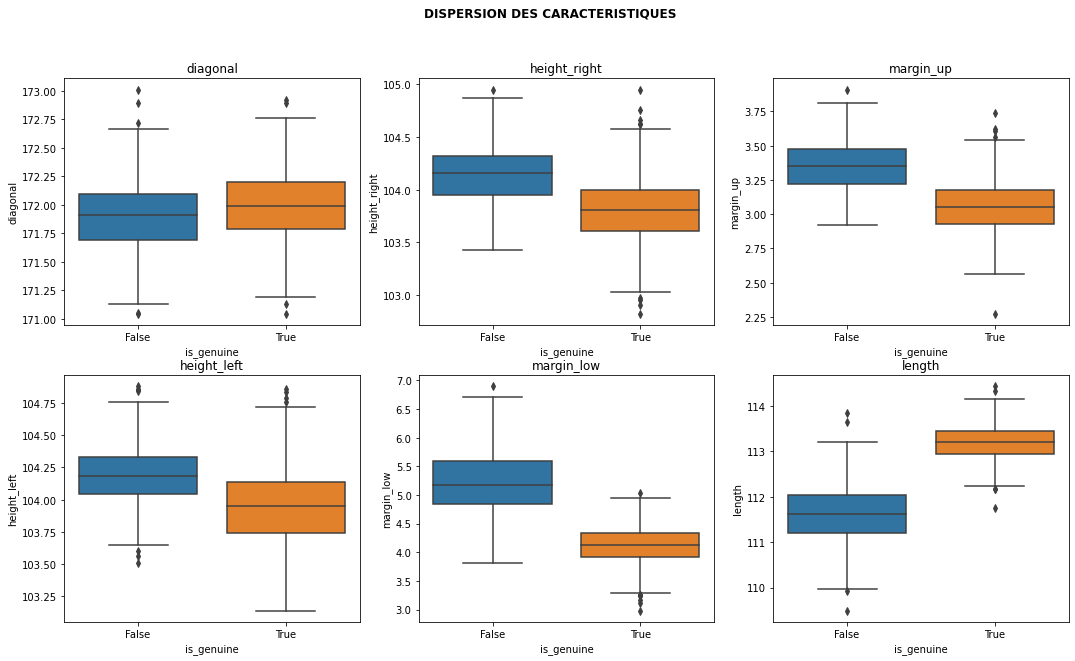

In [71]:
# Boxplot des variables
plt.figure(figsize =(18,10))
plt.suptitle("DISPERSION DES CARACTERISTIQUES", fontsize=12,fontweight='bold')
plt.subplot(2,3,1).set_title('diagonal')
sns.boxplot(x='is_genuine', y='diagonal', data=billets)
plt.subplot(2,3,2).set_title('height_right')
sns.boxplot(x='is_genuine', y='height_right', data=billets)
plt.subplot(2,3,3).set_title('margin_up')
sns.boxplot(x='is_genuine', y='margin_up', data=billets)
plt.subplot(2,3,4).set_title('height_left')
sns.boxplot(x='is_genuine', y='height_left', data=billets)
plt.subplot(2,3,5).set_title('margin_low')
sns.boxplot(x='is_genuine', y='margin_low', data=billets)
plt.subplot(2,3,6).set_title('length')
sns.boxplot(x='is_genuine', y='length', data=billets);

## 1.5 - Analyse des valeurs aberrantes

Selon les boxplots, nous observons quelques outliers notamment sur les variables 'diagonal' et 'height_right'.  
Nous réalisons une analyse plus fine de ces valeurs.

In [72]:
billets_aberrantes=billets.copy()
billets_aberrantes['Z_diag']=(billets_aberrantes['diagonal']-billets_aberrantes['diagonal'].mean())/billets_aberrantes['diagonal'].std()
diag_aberrantes=billets_aberrantes.sort_values('Z_diag', ascending=False)
diag_aberrantes=diag_aberrantes.loc[(diag_aberrantes['Z_diag']>3) | (diag_aberrantes['Z_diag']< -3 ),:]
diag_aberrantes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Z_diag
1277,False,173.01,104.59,104.31,5.04,3.05,110.91,3.445533
828,True,172.92,103.55,103.94,4.78,3.27,113.55,3.150640
1022,False,172.89,104.03,104.03,6.03,3.00,110.95,3.052342
842,True,172.89,103.77,104.24,4.12,3.01,113.72,3.052342
1142,False,171.04,104.23,104.22,4.87,3.56,111.54,-3.009353
729,True,171.04,103.84,103.64,4.22,3.36,112.70,-3.009353


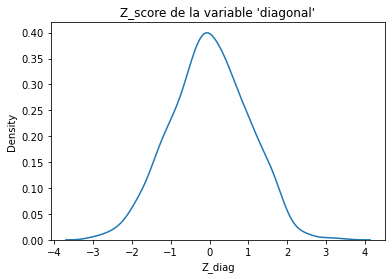

In [73]:
ax=sns.kdeplot(billets_aberrantes['Z_diag'])
plt.title("Z_score de la variable 'diagonal'", fontsize=12);

In [74]:
billets_aberrantes['Z_height_r']=(billets_aberrantes['height_right']-billets_aberrantes['height_right'].mean())/billets_aberrantes['height_right'].std()
height_r_aberrantes=billets_aberrantes.sort_values('Z_height_r', ascending=False)
height_r_aberrantes=height_r_aberrantes.loc[(height_r_aberrantes['Z_height_r']>3) | (height_r_aberrantes['Z_height_r']< -3 ),:]
height_r_aberrantes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Z_diag,Z_height_r
0,True,171.81,104.86,104.95,4.520000,2.89,112.83,-0.486377,3.162186
1484,False,172.08,103.96,104.95,5.220000,3.45,112.07,0.398303,3.162186
522,True,172.02,104.42,102.91,3.860000,3.12,113.43,0.201707,-3.102649
251,True,171.80,103.26,102.82,3.779212,2.95,113.22,-0.519143,-3.379039


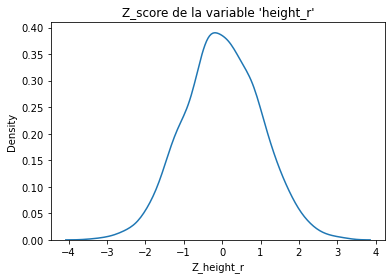

In [75]:
ax=sns.kdeplot(billets_aberrantes['Z_height_r'])
plt.title("Z_score de la variable 'height_r'", fontsize=12);

Finalement, il y a quelques valeurs extrêmes, mais pas de valeurs aberrantes à éliminer pour la modélisation.

# <a name="A2">2 - Modélisation sur valeurs brutes</a> <a href="#C">§</a>

## 2.1 - Préparation des train_set et test_set 

In [76]:
X=billets.drop(columns=['is_genuine'])
y=billets['is_genuine']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=10,shuffle=True)

In [78]:
X_train.shape

(1125, 6)

In [79]:
y_train.shape

(1125,)

In [80]:
y_train.value_counts()

True     759
False    366
Name: is_genuine, dtype: int64

In [81]:
y_train.value_counts(normalize=True)

True     0.674667
False    0.325333
Name: is_genuine, dtype: float64

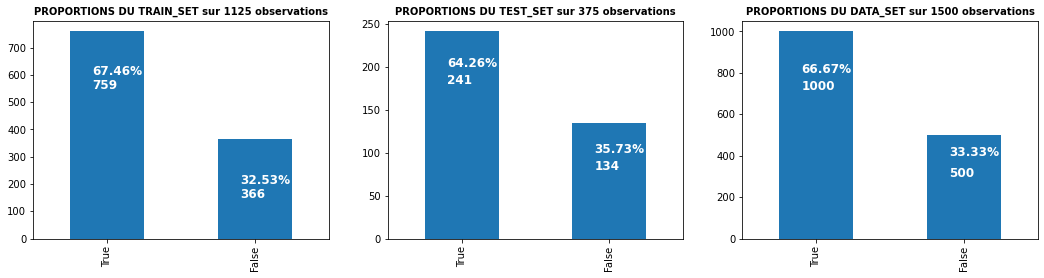

In [82]:
#Visualisation des sets
plt.figure(figsize =(18,4))

plt.subplot(1,3,1).set_title('PROPORTIONS DU TRAIN_SET sur 1125 observations', fontweight='bold', fontsize=10)
y_train.value_counts().plot(kind='bar')
plt.annotate('67.46%', xy=(-0.1, 600), xytext= (-0.1, 600), color='w', fontsize=12, fontweight='bold')
plt.annotate('759', xy=(-0.1, 550), xytext= (-0.1, 550), color='w', fontsize=12, fontweight='bold')
plt.annotate('32.53%', xy=(0.9, 200), xytext=(0.9, 200), color='w', fontsize=12, fontweight='bold')
plt.annotate('366', xy=(0.9, 150), xytext=(0.9, 150), color='w', fontsize=12, fontweight='bold')

plt.subplot(1,3,2).set_title('PROPORTIONS DU TEST_SET sur 375 observations', fontweight='bold', fontsize=10)
y_test.value_counts().plot(kind='bar')
plt.annotate('64.26%', xy=(-0.1, 200), xytext= (-0.1, 200), color='w', fontsize=12, fontweight='bold')
plt.annotate('241', xy=(-0.1, 180), xytext= (-0.1, 180), color='w', fontsize=12, fontweight='bold')
plt.annotate('35.73%', xy=(0.9, 100), xytext=(0.9, 100), color='w', fontsize=12, fontweight='bold')
plt.annotate('134', xy=(0.9, 80), xytext=(0.9, 80), color='w', fontsize=12, fontweight='bold')

plt.subplot(1,3,3).set_title('PROPORTIONS DU DATA_SET sur 1500 observations', fontweight='bold', fontsize=10)
y.value_counts().plot(kind='bar')
plt.annotate('66.67%', xy=(-0.1, 800), xytext= (-0.1, 800), color='w', fontsize=12, fontweight='bold')
plt.annotate('1000', xy=(-0.1, 720), xytext= (-0.1, 720), color='w', fontsize=12, fontweight='bold')
plt.annotate('33.33%', xy=(0.9, 400), xytext=(0.9, 400), color='w', fontsize=12, fontweight='bold')
plt.annotate('500', xy=(0.9, 300), xytext=(0.9, 300), color='w', fontsize=12, fontweight='bold');

Les sets sont bien représentatifs de l'échantillon. Nous pouvons commencer les essais de modélisation.  
Pour avoir une référence, nous utilisons dans un premier temps un classifieur naïf.

## 2.2 - Utilisation d'un Dummy classifier

In [83]:
from sklearn.dummy import DummyClassifier 

In [84]:
# 1ère statégie :
model_dum=DummyClassifier(strategy='most_frequent')

In [85]:
model_dum.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [86]:
y_pred =model_dum.predict(X_test)

In [87]:
pd.Series(y_pred).value_counts()   

True    375
dtype: int64

In [88]:
pd.Series(y_pred).value_counts(normalize=True)         

True    1.0
dtype: float64

In [89]:
train_score = model_dum.score(X_train, y_train).round(4)
test_score = model_dum.score(X_test, y_test).round(4)

In [90]:
 print(f"score train : {train_score} score test : {test_score}")

score train : 0.6747 score test : 0.6427


Les valeurs correspondent exactement à la proportion de vrais billets des sets.

In [91]:
# 2ème statégie :
model_dum=DummyClassifier(strategy='stratified')

In [92]:
model_dum.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [93]:
y_pred =model_dum.predict(X_test)

In [94]:
pd.Series(y_pred).value_counts()   

True     240
False    135
dtype: int64

In [95]:
pd.Series(y_pred).value_counts(normalize=True).round(4)         

True     0.64
False    0.36
dtype: float64

Le modèle prédit 68,27% de vrais billets et 31,73% de faux billets.

In [96]:
train_score = model_dum.score(X_train, y_train).round(4)
test_score = model_dum.score(X_test, y_test).round(4)

In [97]:
 print(f"score train : {train_score} score test : {test_score}")

score train : 0.5476 score test : 0.552


Ces valeurs serviront de baseline pour les autres modélisations.

## 2.3 - Modélisation par régression logistique

In [98]:
from sklearn.linear_model import LogisticRegression

### 2.3.1 - Premier essai

In [99]:
model_logReg = LogisticRegression(solver = 'liblinear',random_state=10)

In [100]:
# entrainement du modèle
model_logReg.fit(X_train, y_train)

LogisticRegression(random_state=10, solver='liblinear')

In [101]:
# prédiction sur X_test
y_pred=model_logReg.predict(X_test)

In [102]:
pd.Series(y_pred).value_counts(normalize=True).round(4)

True     0.6453
False    0.3547
dtype: float64

Le modèle retourne 65.53% de vrais billets et 35,47% de faux billets.  
On peux également avoir une idée du taux de probalité de chaque prédiction.

In [103]:
# probabilité des prédictions
y_prob = model_logReg.predict_proba(X_test).round(2)
y_prob

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.67, 0.33],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.71, 0.29],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.71, 0.29],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.14, 0.86],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.04,

#### Accuracy score = nombre de bonne prediction/nombre de prediction total

In [104]:
train_score = model_logReg.score(X_train, y_train).round(4)
test_score = model_logReg.score(X_test, y_test).round(4)

In [105]:
 print(f"score train : {train_score} score test : {test_score}")

score train : 0.9893 score test : 0.992


Le modèle a un fort accuracy_score, le test_score est supérieur au train_score, nous n'avons donc pas de risque d'overfitting.
On visualise les résultats via une matrice de confusion.

#### Matrice de confusion

In [106]:
from sklearn.metrics import confusion_matrix         

In [107]:
mat= confusion_matrix(y_test, y_pred)

In [108]:
columns = ['pred_false','pred_true']
index = ['test_false','test_true']

In [109]:
matrice = pd.DataFrame(data=mat,index=index,columns=columns)
matrice

,pred_false,pred_true
test_false,132,2
test_true,1,240


Le modèle n'a fait que 3 erreurs de classement : 2 faux positifs et 1 faux négatif.  

#### Métriques de la matrice de confusion

In [110]:
from sklearn.metrics import classification_report

In [111]:
y_true= y_test

In [112]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       134
        True       0.99      1.00      0.99       241

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



Comme pressenti dans la matrice de confusion, les différents métriques : les recall (vrais positifs sur total des vrais  ou vrai négatifs sur total des faux) et les precision (vrais positifs sur total des prédits vrais  ou vrai négatifs sur total prédits des faux) ont des valeurs élevées.  
Leur valeur harmonique F1_score est également élevées puis qu'elle varie avec le recall et la precision

 #### Etude de la performance du modèle : ROC curve

On représente sur un graphique le taux de vrais positifs (fraction des positifs effectivement détectés) en fonction du taux de faux positifs (fraction des négatifs qui sont incorrectement détectés)

In [113]:
from sklearn.metrics import roc_curve, auc

In [114]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [115]:
roc_auc= auc(false_positive_rate, true_positive_rate)
roc_auc

0.9904626246361553

L'aire sous courbe roc_auc est proche de 1, donc proche d'un modèle parfait.

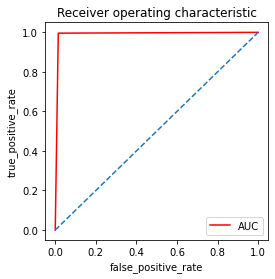

In [116]:
# Representation de la ROC curve
plt.figure(figsize=(4,4))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label ='AUC')
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

### 2.3.2 - Validation croisée

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
cross_val_score(model_logReg, X, y, cv=5, scoring='accuracy')

array([0.98666667, 0.98333333, 0.99666667, 0.98666667, 0.99      ])

La validation croisée donne des accuracy_score équivalents quelque soit le jeu de train ou de test sélectionnés.   
Le modèle semble déja très performant, on peut toutefois essayer encore de l'améliorer en cherchant les hyperparamètres.

### 2.3.3 - Recherche d'hyperparametres

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid={'C':[0.001,0.01,0.1,1],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter' :[1000]}
model_logReg_cv=GridSearchCV(model_logReg, param_grid,cv=10)
model_logReg_cv.fit(X_train,y_train)

print("best parameters",model_logReg_cv.best_params_)
print("accuracy :",model_logReg_cv.best_score_)

best parameters {'C': 1, 'max_iter': 1000, 'solver': 'newton-cg'}
accuracy : 0.9893173198482932


Le Gridsearch préconise l'utilisation du solver newton_cg, je réalise une deuxième essai.

### 2.3.3 - Deuxième essai

In [121]:
model_logReg = LogisticRegression(solver = 'newton-cg',random_state=10)

In [122]:
# entrainement du modèle
model_logReg.fit(X_train, y_train)

LogisticRegression(random_state=10, solver='newton-cg')

In [123]:
# prédiction sur X_test
y_pred=model_logReg.predict(X_test)

In [124]:
pd.Series(y_pred).value_counts(normalize=True).round(4)

True     0.6453
False    0.3547
dtype: float64

#### Accuracy score 

In [125]:
train_score = model_logReg.score(X_train, y_train).round(4)
test_score = model_logReg.score(X_test, y_test).round(4)

In [126]:
 print(f"score train : {train_score} score test : {test_score}")

score train : 0.9902 score test : 0.992


#### Matrice de confusion

In [127]:
mat= confusion_matrix(y_test, y_pred)

In [128]:
columns = ['pred_false','pred_true']
index = ['test_false','test_true']

In [129]:
matrice = pd.DataFrame(data=mat,index=index,columns=columns)
matrice

,pred_false,pred_true
test_false,132,2
test_true,1,240


#### Métriques de la matrice de confusion

In [130]:
y_true= y_test

In [131]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       134
        True       0.99      1.00      0.99       241

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



#### ROC curve

In [132]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [133]:
roc_auc= auc(false_positive_rate, true_positive_rate)
roc_auc

0.9904626246361553

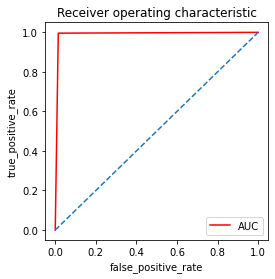

In [134]:
# Representation de la ROC curve
plt.figure(figsize=(4,4))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label ='AUC')
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

Les résultats sont identiques avec les 2 solvers utilisés.

## 2.4 - Modélisation par Kmeans

In [135]:
from sklearn import cluster, metrics 
from sklearn.cluster import KMeans

In [136]:
X_train

,diagonal,height_left,height_right,margin_low,margin_up,length
1421,172.24,104.11,103.55,5.02,3.63,111.33
60,172.24,104.03,103.86,3.71,3.01,113.03
1096,172.34,104.36,103.82,4.92,3.47,111.33
748,171.99,103.91,103.79,4.05,3.11,113.67
1441,171.63,104.55,103.81,6.56,3.10,111.87
...,...,...,...,...,...,...
1393,171.67,104.08,104.73,4.93,3.31,111.81
1344,171.43,104.14,103.95,5.34,3.14,111.76
527,171.92,103.79,103.34,3.84,2.80,113.00
1149,172.02,104.08,104.01,4.63,3.28,111.03


In [137]:
y_train

1421    False
60       True
1096    False
748      True
1441    False
        ...  
1393    False
1344    False
527      True
1149    False
1289    False
Name: is_genuine, Length: 1125, dtype: bool

In [138]:
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [139]:
X = X_train.values

In [140]:
X

array([[172.24, 104.11, 103.55,   5.02,   3.63, 111.33],
       [172.24, 104.03, 103.86,   3.71,   3.01, 113.03],
       [172.34, 104.36, 103.82,   4.92,   3.47, 111.33],
       ...,
       [171.92, 103.79, 103.34,   3.84,   2.8 , 113.  ],
       [172.02, 104.08, 104.01,   4.63,   3.28, 111.03],
       [171.57, 104.08, 104.12,   5.46,   3.21, 111.49]])

### 2.4.1 - Détermination du nombre de clusters

S'agissant d'une classification binaire, on s'attend à travailler avec 2 clusters. Toutefois j'étudie le coefficient de silhouette.

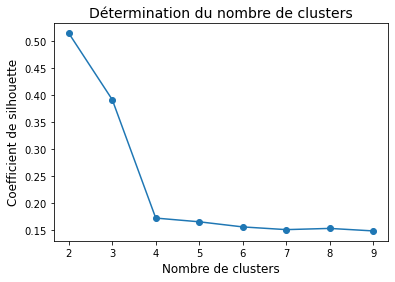

In [141]:
silhouettes = []    
for num_clusters in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters,random_state=8) 
    cls.fit(X) 
    silh= metrics.silhouette_score(X, cls.labels_) 
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')
plt.ylabel('Coefficient de silhouette',fontsize=12)            
plt.xlabel("Nombre de clusters",fontsize=12)                                          
plt.title("Détermination du nombre de clusters", fontsize=14)
plt.show()

Le nombre optimal de clusters déterminé par le graphique est 4, je réalise donc une première modélisation avec 4 clusters.

### 2.4.2 - Modélisation avec 4 clusters

In [142]:
# Entrainement du modèle
model_km_4 = KMeans(n_clusters=4,random_state=8)
model_km_4.fit(X_train)

KMeans(n_clusters=4, random_state=8)

In [143]:
clusters_4 = model_km_4.labels_ 

In [144]:
data_train=X_train.copy()

In [145]:
# Ajout au df d'une colonne groupe
data_train['Groupe']=clusters_4
data_train['is_genuine']=y_train
data_train

,diagonal,height_left,height_right,margin_low,margin_up,length,Groupe,is_genuine
1421,172.24,104.11,103.55,5.02,3.63,111.33,1,False
60,172.24,104.03,103.86,3.71,3.01,113.03,0,True
1096,172.34,104.36,103.82,4.92,3.47,111.33,1,False
748,171.99,103.91,103.79,4.05,3.11,113.67,2,True
1441,171.63,104.55,103.81,6.56,3.10,111.87,3,False
...,...,...,...,...,...,...,...,...
1393,171.67,104.08,104.73,4.93,3.31,111.81,3,False
1344,171.43,104.14,103.95,5.34,3.14,111.76,3,False
527,171.92,103.79,103.34,3.84,2.80,113.00,0,True
1149,172.02,104.08,104.01,4.63,3.28,111.03,1,False


In [146]:
# Visualisation des résultats
cont=pd.crosstab(data_train['Groupe'],data_train['is_genuine'],margins=True,margins_name='Total')
cont

is_genuine,False,True,Total
Groupe,,,
0,19,356,375
1,157,0,157
2,2,403,405
3,188,0,188
Total,366,759,1125


Les groupent 1 et 3 correspondent aux faux billets, les groupes 0 et 2 correspondent aux vrais billets, en définitive on peut considérer qu'il n'y a que 2 clusters.

### 2.4.3 - Modélisation avec 2 clusters

In [147]:
# Entrainement du modèle
model_km_2 = KMeans(n_clusters=2,random_state=8)
model_km_2.fit(X_train)

KMeans(n_clusters=2, random_state=8)

In [148]:
clusters_2 = model_km_2.labels_ 

In [149]:
X_train

,diagonal,height_left,height_right,margin_low,margin_up,length
1421,172.24,104.11,103.55,5.02,3.63,111.33
60,172.24,104.03,103.86,3.71,3.01,113.03
1096,172.34,104.36,103.82,4.92,3.47,111.33
748,171.99,103.91,103.79,4.05,3.11,113.67
1441,171.63,104.55,103.81,6.56,3.10,111.87
...,...,...,...,...,...,...
1393,171.67,104.08,104.73,4.93,3.31,111.81
1344,171.43,104.14,103.95,5.34,3.14,111.76
527,171.92,103.79,103.34,3.84,2.80,113.00
1149,172.02,104.08,104.01,4.63,3.28,111.03


In [150]:
data_train=X_train.copy()

In [151]:
# Ajout de la colonne groupe
data_train['Groupe']=clusters_2
data_train['is_genuine']=y_train
data_train

,diagonal,height_left,height_right,margin_low,margin_up,length,Groupe,is_genuine
1421,172.24,104.11,103.55,5.02,3.63,111.33,0,False
60,172.24,104.03,103.86,3.71,3.01,113.03,1,True
1096,172.34,104.36,103.82,4.92,3.47,111.33,0,False
748,171.99,103.91,103.79,4.05,3.11,113.67,1,True
1441,171.63,104.55,103.81,6.56,3.10,111.87,0,False
...,...,...,...,...,...,...,...,...
1393,171.67,104.08,104.73,4.93,3.31,111.81,0,False
1344,171.43,104.14,103.95,5.34,3.14,111.76,0,False
527,171.92,103.79,103.34,3.84,2.80,113.00,1,True
1149,172.02,104.08,104.01,4.63,3.28,111.03,0,False


In [152]:
# Visualisation des résultats
cont=pd.crosstab(data_train['Groupe'],data_train['is_genuine'],margins=True,margins_name='Total')
cont

is_genuine,False,True,Total
Groupe,,,
0,349,3,352
1,17,756,773
Total,366,759,1125


Le groupe 0 correspond aux faux billets, le groupe 1 aux vrais billets.

In [153]:
# Valeurs des centroïdes
model_km_2.cluster_centers_

array([[171.89497159, 104.19625   , 104.1415625 ,   5.22074849,
          3.33946023, 111.57877841],
       [171.98992238, 103.95280724, 103.82138422,   4.14180792,
          3.05851229, 113.20036223]])

In [154]:
# Prédiction
y_pred_2=model_km_2.predict(X_test)

In [155]:
y_pred_2

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [156]:
pd.Series(y_pred_2).value_counts(normalize=True).round(4)

1    0.6533
0    0.3467
dtype: float64

Le modèle retourne 65.33% de vrais billets (groupe 1) et 34.67% de faux billets (groupe 0)

#### Matrice de confusion

In [157]:
mat= confusion_matrix(y_test, y_pred_2)

In [158]:
columns = ['pred_false','pred_true']
index = ['test_false','test_true']

In [159]:
matrice = pd.DataFrame(data=mat,index=index,columns=columns)
matrice

,pred_false,pred_true
test_false,130,4
test_true,0,241


Le modèle n'a fait que 4 erreurs de classement : 4 faux positifs.

#### Métriques de la matrice de confusion

In [160]:
y_true= y_test

In [161]:
print(classification_report(y_true, y_pred_2))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98       134
        True       0.98      1.00      0.99       241

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



Les résultats sont très proches de ceux obtenus par régression logistique. Le recall(sur True) est légèrement meilleur mais la precision (sur True) est légèrement moins bonne que par la régression logistique.

#### Performance du modèle de classification : ROC curve

In [162]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_2)

In [163]:
roc_auc= auc(false_positive_rate, true_positive_rate)
roc_auc

0.9850746268656717

La valeur est légèrement inférieure à celle obtenue avec la régression logistique.

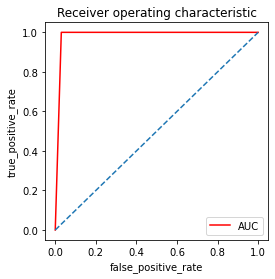

In [164]:
# Representation de la ROC curve
plt.figure(figsize=(4,4))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label ='AUC')
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

## 2.5 - Conception de l'outils de prédiction

Les 2 modèles de classification donne des résultats très comparables mais la régression logistique semble plus performante. C'est donc ce modèle qui sera utiliser pour concevoir l'outils de prédiction.  
Détaillons les différentes étapes nécessaires  :

In [165]:
# Lecture du fichier
billets_production = pd.read_csv('billets_production.csv')
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [166]:
# Sélection des variables 
X_production=billets_production.drop(columns=['id'])

In [167]:
# Prédiction
prediction=model_logReg.predict(X_production)

In [168]:
# Ajout d'une colonne résultat au fichier
billets_production['is_genuine']=prediction
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True


In [169]:
# Calcul du taux de probabilité des prédictions
probabilite= model_logReg.predict_proba(X_production).round(2)

In [170]:
# Ajout des colonnes de probabilité au fichier
billets_production[['proba_false','proba_true']]=probabilite
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,proba_false,proba_true
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,1.00,0.00
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,1.00,0.00
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,1.00,0.00
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.04,0.96
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.00,1.00


Il en résulte la fonction suivante :

## Fonction de détection de faux billets

In [171]:
def detection_faux_billets(nom_du_fichier):
    fichier_prod = pd.read_csv(nom_du_fichier)
    X_prod=fichier_prod.drop(columns=['id'])
    prediction=model_logReg.predict(X_prod)
    fichier_prod['is_genuine']=prediction
    proba=(model_logReg.predict_proba(X_prod)*100).round(2)
    fichier_prod[['proba_false','proba_true']]=proba
    return(fichier_prod[['id','is_genuine','proba_false','proba_true']])

In [172]:
detection_faux_billets('billets_production.csv')

,id,is_genuine,proba_false,proba_true
0,A_1,False,99.62,0.38
1,A_2,False,99.89,0.11
2,A_3,False,99.81,0.19
3,A_4,True,4.04,95.96
4,A_5,True,0.06,99.94


Les différentes modélisations ayant abouti à la conception de la fonction de détection des faux billets ont été
réalisées à partir des valeurs brutes. Il serait intéressant de réaliser le même travail sur des valeurs standardisées et de comparer les résultats.

# <a name="A3">3 - Modélisation sur valeurs standardisées</a> <a href="#C">§</a>

## 3.1 - Normalisation des valeurs

In [173]:
from sklearn import preprocessing 

In [174]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

## 3.2 - Modélisation par régression logistique

In [175]:
model_logReg_sdt = LogisticRegression(solver = 'newton-cg',random_state=10)

In [176]:
# entrainement du modèle
model_logReg_sdt.fit(X_train_scaled, y_train)

LogisticRegression(random_state=10, solver='newton-cg')

In [177]:
# prédiction sur X_test
y_pred=model_logReg_sdt.predict(X_test_scaled)

In [178]:
pd.Series(y_pred).value_counts(normalize=True).round(4)

True     0.6453
False    0.3547
dtype: float64

#### Accuracy_score

In [179]:
train_score = model_logReg_sdt.score(X_train_scaled, y_train).round(4)
test_score = model_logReg_sdt.score(X_test_scaled, y_test).round(4)

In [180]:
 print(f"score train : {train_score} score test : {test_score}")

score train : 0.992 score test : 0.992


#### Matrice de confusion

In [181]:
mat= confusion_matrix(y_test, y_pred)

In [182]:
columns = ['pred_false','pred_true']
index = ['test_false','test_true']

In [183]:
matrice = pd.DataFrame(data=mat,index=index,columns=columns)
matrice

,pred_false,pred_true
test_false,132,2
test_true,1,240


#### Métriques de la matrice de confusion

In [184]:
y_true= y_test

In [185]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       134
        True       0.99      1.00      0.99       241

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



#### ROC_curve

In [186]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [187]:
roc_auc= auc(false_positive_rate, true_positive_rate)
roc_auc

0.9904626246361553

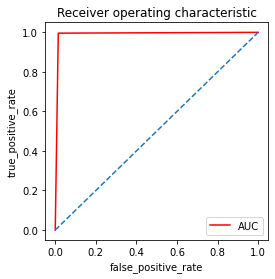

In [188]:
# Representation de la ROC curve
plt.figure(figsize=(4,4))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label ='AUC')
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

#### Recherche d'hyperparamètres

In [189]:
param_grid={'C':[0.001,0.01,0.1,1],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter' :[1000]}
model_logReg_cv_sdt=GridSearchCV(model_logReg_sdt, param_grid,cv=10)
model_logReg_cv_sdt.fit(X_train_scaled,y_train)

print("best parameters",model_logReg_cv.best_params_)
print("accuracy :",model_logReg_cv.best_score_)

best parameters {'C': 1, 'max_iter': 1000, 'solver': 'newton-cg'}
accuracy : 0.9893173198482932


Les paramètres choisis correspondent aux paramètres préconisés par le GridSearch.

## 3.3 - Modélisation par Kmeans

### 3.3.1 - Détermination du nombre de clusters

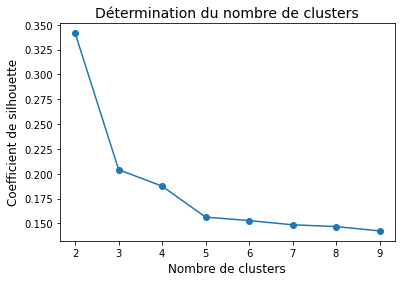

In [190]:
silhouettes = []    
for num_clusters in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters,random_state=8) 
    cls.fit(X_train_scaled) 
    silh= metrics.silhouette_score(X_train_scaled, cls.labels_) 
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')
plt.ylabel('Coefficient de silhouette',fontsize=12)            
plt.xlabel("Nombre de clusters",fontsize=12)                                          
plt.title("Détermination du nombre de clusters", fontsize=14)
plt.show()

### 3.3.2 - Modélisation avec 2 clusters

In [191]:
model_km_3 = KMeans(n_clusters=2,random_state=8)
model_km_3.fit(X_train_scaled)

KMeans(n_clusters=2, random_state=8)

In [192]:
clusters_3 = model_km_3.labels_

In [193]:
clusters_3

array([1, 0, 1, ..., 0, 1, 1])

In [194]:
data_train=X_train.copy()

In [195]:
data_train

,diagonal,height_left,height_right,margin_low,margin_up,length
1421,172.24,104.11,103.55,5.02,3.63,111.33
60,172.24,104.03,103.86,3.71,3.01,113.03
1096,172.34,104.36,103.82,4.92,3.47,111.33
748,171.99,103.91,103.79,4.05,3.11,113.67
1441,171.63,104.55,103.81,6.56,3.10,111.87
...,...,...,...,...,...,...
1393,171.67,104.08,104.73,4.93,3.31,111.81
1344,171.43,104.14,103.95,5.34,3.14,111.76
527,171.92,103.79,103.34,3.84,2.80,113.00
1149,172.02,104.08,104.01,4.63,3.28,111.03


In [196]:
clusters_3

array([1, 0, 1, ..., 0, 1, 1])

In [197]:
data_train['Groupe']=clusters_3
data_train['is_genuine']=y_train
data_train

,diagonal,height_left,height_right,margin_low,margin_up,length,Groupe,is_genuine
1421,172.24,104.11,103.55,5.02,3.63,111.33,1,False
60,172.24,104.03,103.86,3.71,3.01,113.03,0,True
1096,172.34,104.36,103.82,4.92,3.47,111.33,1,False
748,171.99,103.91,103.79,4.05,3.11,113.67,0,True
1441,171.63,104.55,103.81,6.56,3.10,111.87,1,False
...,...,...,...,...,...,...,...,...
1393,171.67,104.08,104.73,4.93,3.31,111.81,1,False
1344,171.43,104.14,103.95,5.34,3.14,111.76,1,False
527,171.92,103.79,103.34,3.84,2.80,113.00,0,True
1149,172.02,104.08,104.01,4.63,3.28,111.03,1,False


In [198]:
# Avec les valeurs standardisées, le numéro attribué aux groupes n'est pas reproductible, sachant que la première ligne du data_train correspond à un faux billet, on inverse les valeurs (1 ou 0) si nécessaire
map_dict={0:1, 1:0}

if (data_train.iloc[0,6])==1:
    data_train['Groupe']=data_train['Groupe'].map(map_dict)
else:
    data_train['Groupe']=data_train['Groupe']

In [199]:
data_train

,diagonal,height_left,height_right,margin_low,margin_up,length,Groupe,is_genuine
1421,172.24,104.11,103.55,5.02,3.63,111.33,0,False
60,172.24,104.03,103.86,3.71,3.01,113.03,1,True
1096,172.34,104.36,103.82,4.92,3.47,111.33,0,False
748,171.99,103.91,103.79,4.05,3.11,113.67,1,True
1441,171.63,104.55,103.81,6.56,3.10,111.87,0,False
...,...,...,...,...,...,...,...,...
1393,171.67,104.08,104.73,4.93,3.31,111.81,0,False
1344,171.43,104.14,103.95,5.34,3.14,111.76,0,False
527,171.92,103.79,103.34,3.84,2.80,113.00,1,True
1149,172.02,104.08,104.01,4.63,3.28,111.03,0,False


In [200]:
cont=pd.crosstab(data_train['Groupe'],data_train['is_genuine'],margins=True,margins_name='Total')
cont

is_genuine,False,True,Total
Groupe,,,
0,357,9,366
1,9,750,759
Total,366,759,1125


In [201]:
model_km_3.cluster_centers_

array([[ 0.10299583, -0.28880851, -0.33967913, -0.5381805 , -0.42080711,
         0.58379238],
       [-0.21358972,  0.59892256,  0.70441655,  1.11606284,  0.87265737,
        -1.21065142]])

In [202]:
y_pred_3=model_km_3.predict(X_test_scaled)

In [203]:
y_pred_3

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,

In [204]:
# Même problème de reproductivité des numéros de groupe mais pour un array
if (y_pred_3[0])==0:
    y_pred_3=np.invert(y_pred_3.astype(bool))

In [205]:
y_pred_3

array([ True,  True, False, False, False,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
        True, False,

In [206]:
y_pred_3=y_pred_3.astype(int)

In [207]:
y_pred_3

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [208]:
pd.Series(y_pred_3).value_counts()

1    244
0    131
dtype: int64

In [209]:
y_test

633      True
56       True
1245    False
1306    False
1031    False
        ...  
751      True
1380    False
1218    False
924      True
1285    False
Name: is_genuine, Length: 375, dtype: bool

In [210]:
y_pred_3=y_pred_3.astype("bool")

In [211]:
pd.Series(y_pred_3).value_counts(normalize=True).round(4)

True     0.6507
False    0.3493
dtype: float64

#### Matrice de confusion

In [212]:
mat= confusion_matrix(y_test, y_pred_3)

In [213]:
columns = ['pred_false','pred_true']
index = ['test_false','test_true']

In [214]:
matrice = pd.DataFrame(data=mat,index=index,columns=columns)
matrice

,pred_false,pred_true
test_false,130,4
test_true,1,240


#### Métriques de la matrice de confusion

In [215]:
y_true= y_test

In [216]:
# metrics de la matrice de confusion
print(classification_report(y_true, y_pred_3))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       134
        True       0.98      1.00      0.99       241

    accuracy                           0.99       375
   macro avg       0.99      0.98      0.99       375
weighted avg       0.99      0.99      0.99       375



#### ROC Curve

In [217]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_3)

In [218]:
roc_auc= auc(false_positive_rate, true_positive_rate)
roc_auc

0.9829999380689911

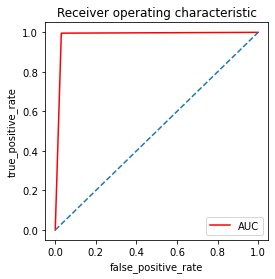

In [219]:
# Representation de la ROC curve
plt.figure(figsize=(4,4))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label ='AUC')
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

In [220]:
data_test=X_test.copy()

In [221]:
data_test['y_true']=y_test
data_test['is_genuine']=y_pred_3
data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,y_true,is_genuine
633,172.40,104.19,103.98,4.08,2.93,113.44,True,True
56,171.25,104.23,103.93,4.36,2.68,113.50,True,True
1245,172.26,104.04,104.43,3.82,3.47,111.95,False,False
1306,172.13,103.99,104.06,5.80,3.28,111.30,False,False
1031,172.40,104.00,103.82,6.33,3.10,112.11,False,False
...,...,...,...,...,...,...,...,...
751,172.67,104.69,104.18,4.31,2.94,113.59,True,True
1380,171.58,103.87,104.07,4.67,3.51,111.53,False,False
1218,171.68,104.67,103.71,5.26,3.22,111.32,False,False
924,172.45,103.99,104.39,3.43,2.66,112.93,True,True


Les 2 modèles de classification donne des résultats très comparables mais la régression logistique est toujours plus performante. C'est donc ce modèle qui sera utiliser pour concevoir l'outils de prédiction.

### 3.4 - Fonction de détection de faux billets, avec données normalisées

In [222]:
# par régression logistique
def detection_faux_billets_sdt(nom_du_fichier):
    fichier_prod = pd.read_csv(nom_du_fichier)
    X_prod=fichier_prod.drop(columns=['id'])
    std_scale = preprocessing.StandardScaler().fit(X_prod)
    X_scaled = std_scale.transform(X_prod)
    prediction=model_logReg_sdt.predict(X_scaled)
    fichier_prod['is_genuine']=prediction
    proba=(model_logReg_sdt.predict_proba(X_scaled)*100).round(2)
    fichier_prod[['proba_false','proba_true']]=proba
    return(fichier_prod[['id','is_genuine','proba_false','proba_true']])

In [223]:
detection_faux_billets_sdt('billets_production.csv')

,id,is_genuine,proba_false,proba_true
0,A_1,False,93.48,6.52
1,A_2,False,98.33,1.67
2,A_3,False,99.03,0.97
3,A_4,True,0.01,99.99
4,A_5,True,0.00,100.00


# <a name="A4">4 - Conclusion</a> <a href="#C">§</a>

### 4.1- Comparaison des méthodes

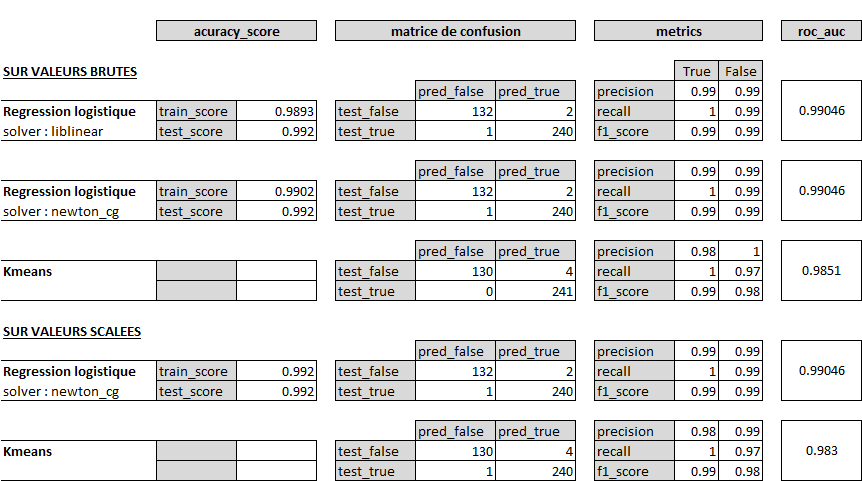

In [224]:
# pour rappel
y_test.value_counts()

True     241
False    134
Name: is_genuine, dtype: int64

Dans cet exemple, on ne note pas de différence entre les modélisations sur valeurs brutes et valeurs standardisées, certainement parce que les mesures des billlets sont du même ordre de grandeur et de même unité. Quoiqu'il en soit, il est préférable d'utiliser une fonction avec valeurs standardisées.  
En ce qui concerne le modèle, on obtient de très bon résultats avec les 2 méthodes, avec un léger avantage pour la régression logistique.  
Ce qui nous conduit à l'outils de prédiction suivant :

### 4.2- Outils de prédiction choisi

Modélisation par régression logistique avec solver newton_cg sur valeurs standardisées.

In [225]:
def detection_faux_billets_sdt(nom_du_fichier):
    fichier_prod = pd.read_csv(nom_du_fichier)
    X_prod=fichier_prod.drop(columns=['id'])
    prediction=model_logReg.predict(X_prod)
    fichier_prod['is_genuine']=prediction
    proba=(model_logReg.predict_proba(X_prod)*100).round(2)
    fichier_prod[['proba_false','proba_true']]=proba
    return(fichier_prod[['id','is_genuine','proba_false','proba_true']])

In [226]:
detection_faux_billets_sdt('billets_production.csv')

,id,is_genuine,proba_false,proba_true
0,A_1,False,99.62,0.38
1,A_2,False,99.89,0.11
2,A_3,False,99.81,0.19
3,A_4,True,4.04,95.96
4,A_5,True,0.06,99.94


## Test en direct

In [227]:
detection_faux_billets_sdt('billets_test (2).csv')

,id,is_genuine,proba_false,proba_true
0,B_1,True,1.03,98.97
1,B_2,False,99.28,0.72
2,B_3,True,0.11,99.89
3,B_4,False,99.98,0.02
4,B_5,False,98.41,1.59
